In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

- id
- age : 나이
- workclass : 고용 형태
- fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
- education : 교육 수준
- education_num : 교육 수준 수치
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- capital_gain : 양도 소득
- capital_loss : 양도 손실
- hours_per_week : 주당 근무 시간
- native_country : 국적
- income : 수익 (예측해야 하는 값)

In [3]:
print(train.shape, test.shape)

(26049, 16) (6512, 15)


train, test 의 분포를 따로 봐야하는 이유는 캐글에서 가끔 함정으로 train 에 없는 값 분포를 test에 심어 놓기 때문

In [4]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [5]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [6]:
# 결측치
print(train.isnull().sum(),'\n')
print(test.isnull().sum())

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64 

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [7]:
# 컬럼 별 info() 확인
print(train.info(),'\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Rang

In [8]:
# Target 변환 (Income)
train['income'].value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

In [9]:
# 소득이 50k이하인 사람은 0, 그렇지 않으면 1 (즉, 저소득자 0, 고소득자 1)
train['income'] = train['income'].apply(lambda x: 0 if x == '<=50K' else 1)
train['income'].value_counts()

0    19744
1     6305
Name: income, dtype: int64

# 전처리
train, test 데이터 확인 결과 별다른 이상이 없어서 train+test로 병합하여 전처리한다.

In [10]:
all_data = pd.concat([train, test])
all_data.head(1)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1.0


## 칼럼별로 살펴보기 (int64형)
 -   age : 나이             
 -   fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)          
 -   education_num : 교육 수준    
 -  capital_gain : 양도 소득    
 -  capital_loss : 양도 손실    
 -  hours_per_week : 주당 근무 시간

<AxesSubplot:xlabel='hours_per_week', ylabel='Density'>

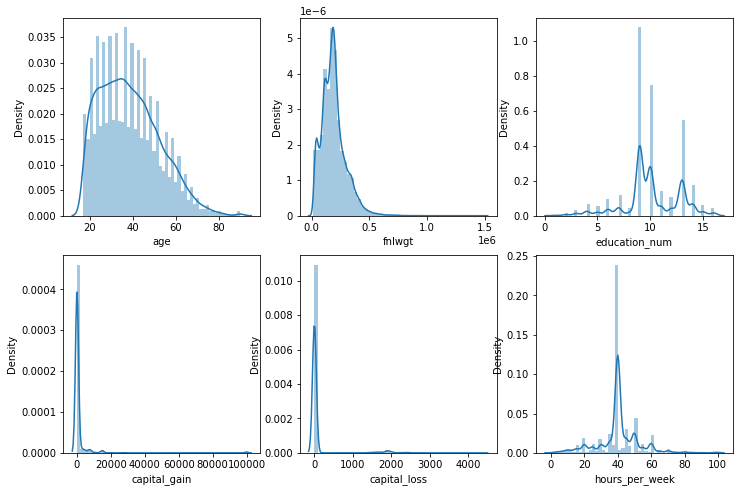

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(231)
sns.distplot(all_data['age'])
plt.subplot(232)
sns.distplot(all_data['fnlwgt'])
plt.subplot(233)
sns.distplot(all_data['education_num'])
plt.subplot(234)
sns.distplot(all_data['capital_gain'])
plt.subplot(235)
sns.distplot(all_data['capital_loss'])
plt.subplot(236)
sns.distplot(all_data['hours_per_week'])

<AxesSubplot:xlabel='capital_loss_log', ylabel='Density'>

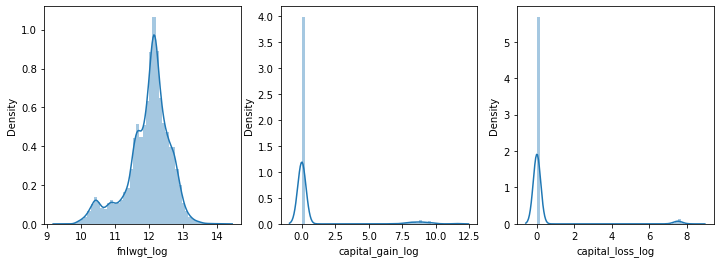

In [12]:
# fnlwgt, capital_gain, capital_loss에 로그를 취한다.
all_data['fnlwgt_log'] = np.log1p(all_data['fnlwgt'])
all_data['capital_gain_log'] = np.log1p(all_data['capital_gain'])
all_data['capital_loss_log'] = np.log1p(all_data['capital_loss'])

plt.figure(figsize=(12,4))
plt.subplot(131)
sns.distplot(all_data['fnlwgt_log'])
plt.subplot(132)
sns.distplot(all_data['capital_gain_log'])
plt.subplot(133)
sns.distplot(all_data['capital_loss_log'])

- capital_gain과 capital_loss에는 큰 변화가 없음

### education_num(교육 수준 수치)

In [13]:
# 비슷한 이름을 가진 education 칼럼과 비교
print(all_data['education'].value_counts(),'\n')
print(all_data['education_num'].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [14]:
# 두 칼럼이 동일하기 때문에 둘 중 하나는 제거
all_data = all_data.drop('education_num', axis=1)

## 칼럼별로 살펴보기 (object형)
- workclass : 고용 형태
- education : 교육 수준
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- native_country : 국적

<AxesSubplot:xlabel='native_country'>

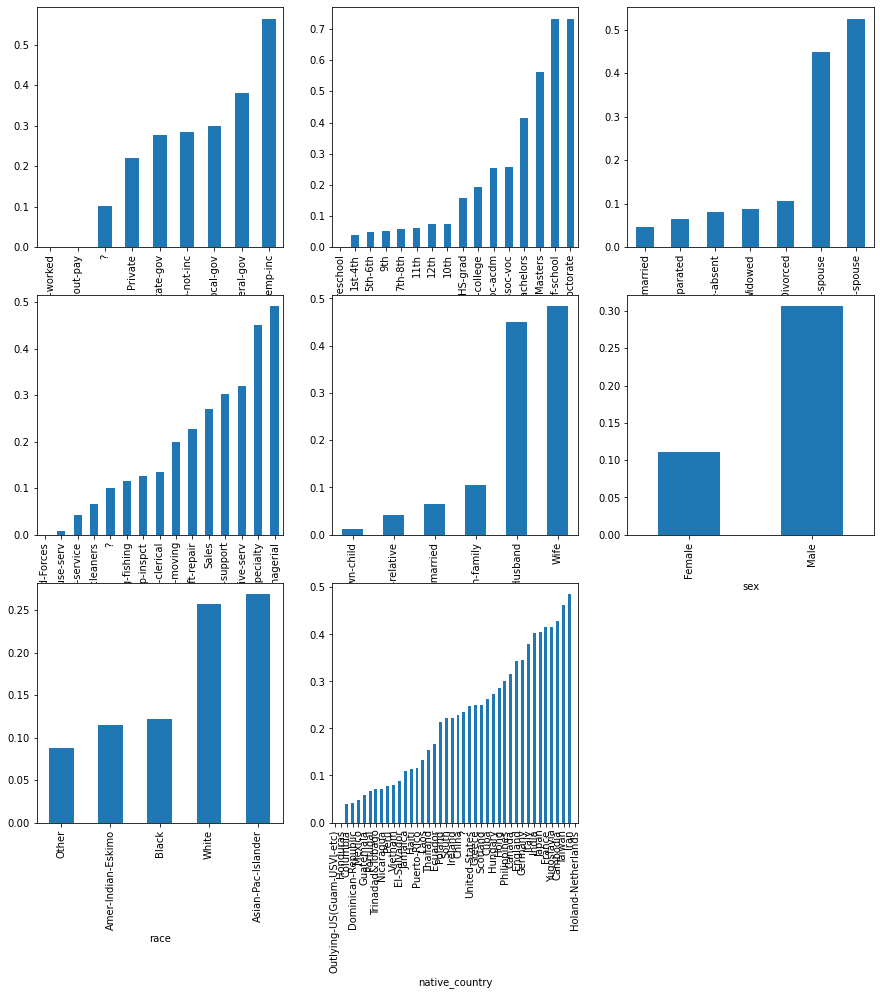

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(331)
all_data.groupby('workclass')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(332)
all_data.groupby('education')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(333)
all_data.groupby('marital_status')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(334)
all_data.groupby('occupation')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(335)
all_data.groupby('relationship')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(336)
all_data.groupby('sex')['income'].mean().sort_values().plot(kind='bar' )
plt.subplot(337)
all_data.groupby('race')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(338)
all_data.groupby('native_country')['income'].mean().sort_values().plot(kind='bar')

### workclass(고용 형태)

- Never-worked와 Without-pay의 평균 income이 0이다.

In [16]:
all_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [17]:
all_data.groupby('workclass')['income'].sum()

workclass
?                    153.0
Federal-gov          292.0
Local-gov            505.0
Never-worked           0.0
Private             3993.0
Self-emp-inc         496.0
Self-emp-not-inc     577.0
State-gov            289.0
Without-pay            0.0
Name: income, dtype: float64

In [18]:
# Never-worked와 Without-pay를 Ohter로 하나로 합친다.
workclass_other = ['Without-pay', 'Never-worked']
all_data['workclass'] = all_data['workclass'].apply(lambda x: 'Other' if x in workclass_other else x)

In [19]:
all_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Other                  21
Name: workclass, dtype: int64

### education : 교육 수준

In [20]:
all_data.groupby(['education'])['income'].agg(['mean', 'count']).sort_values('mean')

,mean,count
education,,
Preschool,0.000000,40
1st-4th,0.037313,134
5th-6th,0.049057,265
9th,0.052632,418
7th-8th,0.057426,505
11th,0.059653,922
12th,0.072423,359
10th,0.072503,731
HS-grad,0.158544,8433


In [21]:
# 8단계로 소득 분위 임의 지정
education_map = {
    'Preschool': 'level_0',
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_1', 
    '9th': 'level_2', 
    '10th': 'level_2', 
    '11th': 'level_2', 
    '12th': 'level_2', 
    'HS-grad': 'level_3', 
    'Some-college': 'level_3', 
    'Assoc-acdm': 'level_4', 
    'Assoc-voc': 'level_4', 
    'Bachelors': 'level_5', 
    'Masters': 'level_6', 
    'Prof-school': 'level_7', 
    'Doctorate': 'level_7',
}

In [22]:
all_data['education'] = all_data['education'].map(education_map)

In [23]:
all_data['education'].value_counts()

level_3    17792
level_5     5355
level_2     3055
level_4     2449
level_6     1723
level_1     1147
level_7      989
level_0       51
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

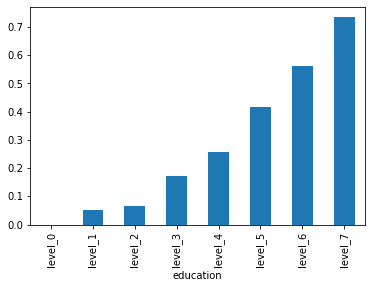

In [24]:
all_data.groupby('education')['income'].mean().sort_values().plot(kind='bar')

### occupation(업종)

In [25]:
all_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

- Armed-Forces가 매우 소수이다.

In [26]:
all_data.groupby('occupation')['income'].sum()

occupation
?                     153.0
Adm-clerical          402.0
Armed-Forces            0.0
Craft-repair          738.0
Exec-managerial      1593.0
Farming-fishing        91.0
Handlers-cleaners      71.0
Machine-op-inspct     200.0
Other-service         110.0
Priv-house-serv         1.0
Prof-specialty       1491.0
Protective-serv       167.0
Sales                 811.0
Tech-support          224.0
Transport-moving      253.0
Name: income, dtype: float64

- Armed-Forces의 income은 모두 0임을 알 수 있다.

In [27]:
# 과적합 방지를 위해 Armed-Forces을 Priv-house-serve에 포함시킨다.
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'

In [28]:
all_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       158
Name: occupation, dtype: int64

### native_country(국적)
- https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita 에 따라 그룹으로 나눈다.
- 사람에 따라 칼럼 자체를 drop한 경우도 있음

In [29]:
all_data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [30]:
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]

In [31]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'

In [32]:
all_data['country_bin'] = all_data['native_country'].apply(convert_country)
all_data['country_bin'].value_counts()

income_04       29170
income_02        1157
income_other      583
income_06         319
income_01         303
income_08         299
income_03         239
income_07         227
income_05         170
income_09          94
Name: country_bin, dtype: int64

## 최종 칼럼 선택

In [34]:
features = [
#     'id', 
    'age', 
    'workclass', 
#     'fnlwgt', 
    'fnlwgt_log', 
    'education', 
    'marital_status',
    'occupation',
    'relationship', 
    'race',
    'sex',
#    'capital_gain',
    'capital_gain_log',
#    'capital_loss', 
    'capital_loss_log', 
    'hours_per_week',
#    'native_country',
    'country_bin'
]

In [35]:
label = ['income']

In [36]:
# One-Hot Encoding
all_data_dummies = pd.get_dummies(all_data[features + label])

In [37]:
all_data_dummies.head()

,age,fnlwgt_log,capital_gain_log,capital_loss_log,hours_per_week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Other,...,country_bin_income_01,country_bin_income_02,country_bin_income_03,country_bin_income_04,country_bin_income_05,country_bin_income_06,country_bin_income_07,country_bin_income_08,country_bin_income_09,country_bin_income_other
0,40,12.034922,0.0,0.0,60,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,17,11.529065,0.0,0.0,20,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,18,12.775240,0.0,0.0,16,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,11.926088,0.0,0.0,25,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,11.713701,0.0,0.0,20,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
train_features = all_data_dummies.drop('income', axis=1).iloc[:len(train)]
test_features = all_data_dummies.drop('income', axis=1).iloc[len(train):]

In [39]:
train_features.shape, test_features.shape

((26049, 65), (6512, 65))

In [40]:
train_label = train[label]

# 분류모델 적용

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=6)

## randomforest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 85.3%


In [43]:
pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      3949
           1       0.74      0.61      0.67      1261

    accuracy                           0.85      5210
   macro avg       0.81      0.77      0.79      5210
weighted avg       0.85      0.85      0.85      5210



In [44]:
rf_scores = cross_val_score(rf, train_features, train_label, scoring='f1', cv = 5)
print('평균 검증 f1 score:' ,np.round(np.mean(rf_scores),4))

평균 검증 f1 score: 0.6785


## xgboost

In [54]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(random_state=42)
evals = [(x_test,y_test)]

xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_set=evals,verbose=True)

print("Test Accuracy: {}%".format(round(xgb_wrapper.score(x_test, y_test)*100, 2)))

[11:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.54529
[1]	validation_0-logloss:0.46540
[2]	validation_0-logloss:0.41560
[3]	validation_0-logloss:0.37944
[4]	validation_0-logloss:0.35726
[5]	validation_0-logloss:0.34107
[6]	validation_0-logloss:0.33046
[7]	validation_0-logloss:0.32190
[8]	validation_0-logloss:0.31618
[9]	validation_0-logloss:0.31242
[10]	validation_0-logloss:0.30907
[11]	validation_0-logloss:0.30684
[12]	validation_0-logloss:0.30534
[13]	validation_0-logloss:0.30403
[14]	validation_0-logloss:0.30236
[15]	validation_0-logloss:0.30015
[16]	validation_0-logloss:0.29927
[17]	validation_0-logloss:0.29820
[18]	validation_0-logloss:0.29713
[19]	validation_0-logloss:0.29665
[20]	validation_0-lo

In [55]:
pred_xgb = xgb_wrapper.predict(x_test)
print("XGBClassifier report: \n\n", classification_report(y_test, pred_xgb))

XGBClassifier report: 

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      3949
           1       0.78      0.63      0.69      1261

    accuracy                           0.87      5210
   macro avg       0.83      0.78      0.80      5210
weighted avg       0.86      0.87      0.86      5210



In [56]:
xgb_wrapper_scores = cross_val_score(xgb_wrapper, train_features, train_label, scoring='f1', cv = 5)
print('평균 검증 f1 score:' ,np.round(np.mean(xgb_wrapper_scores),4))

[11:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## lgbm

In [58]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(random_state=42)

evals = [(x_test,y_test)]

lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_set=evals,verbose=True)
print("Test Accuracy: {}%".format(round(lgbm_wrapper.score(x_test, y_test)*100, 2)))

[1]	valid_0's binary_logloss: 0.51121
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.479711
[3]	valid_0's binary_logloss: 0.45501
[4]	valid_0's binary_logloss: 0.434664
[5]	valid_0's binary_logloss: 0.417514
[6]	valid_0's binary_logloss: 0.403037
[7]	valid_0's binary_logloss: 0.390581
[8]	valid_0's binary_logloss: 0.379714
[9]	valid_0's binary_logloss: 0.369946
[10]	valid_0's binary_logloss: 0.36195
[11]	valid_0's binary_logloss: 0.354916
[12]	valid_0's binary_logloss: 0.34849
[13]	valid_0's binary_logloss: 0.343188
[14]	valid_0's binary_logloss: 0.337497
[15]	valid_0's binary_logloss: 0.332999
[16]	valid_0's binary_logloss: 0.329298
[17]	valid_0's binary_logloss: 0.325438
[18]	valid_0's binary_logloss: 0.322051
[19]	valid_0's binary_logloss: 0.319114
[20]	valid_0's binary_logloss: 0.316654
[21]	valid_0's binary_logloss: 0.314419
[22]	valid_0's binary_logloss: 0.312384
[23]	valid_0's binary_logloss: 0.310718
[24]	valid_0's binary_logloss: 

In [59]:
preds = lgbm_wrapper.predict(x_test)
print("lgbm report: \n\n", classification_report(y_test, preds))

lgbm report: 

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      3949
           1       0.78      0.64      0.70      1261

    accuracy                           0.87      5210
   macro avg       0.83      0.79      0.81      5210
weighted avg       0.86      0.87      0.86      5210



In [60]:
lgbm_wrapper_scores = cross_val_score(lgbm_wrapper, train_features, train_label, scoring='f1', cv = 5)
print('평균 검증 f1 score:' ,np.round(np.mean(lgbm_wrapper_scores),4))

평균 검증 f1 score: 0.7119


## autoML

In [47]:
!pip install pycaret

In [61]:
from pycaret.classification import *

In [62]:
all_data_caret = all_data[features + label]
all_data_caret.head(1)

,age,workclass,fnlwgt_log,education,marital_status,occupation,relationship,race,sex,capital_gain_log,capital_loss_log,hours_per_week,country_bin,income
0,40,Private,12.034922,level_3,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,income_04,1.0


In [63]:
train_clean = all_data_caret[:len(train)]
test_clean = all_data_caret[len(train):]

In [68]:
setup(data = train_clean, target = 'income',session_id=42)

,Description,Value
0,session_id,42
1,Target,income
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(26049, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


(-1,
         age  fnlwgt_log  capital_gain_log  capital_loss_log  hours_per_week  \
 7792   49.0   11.567555          0.000000               0.0            50.0   
 10861  31.0   12.487247          0.000000               0.0            40.0   
 1668   17.0   10.218882          0.000000               0.0            20.0   
 25683  59.0   12.172185          0.000000               0.0            40.0   
 6876   32.0   11.973125          0.000000               0.0            60.0   
 ...     ...         ...               ...               ...             ...   
 3242   23.0   11.668484          0.000000               0.0            50.0   
 23591  49.0   11.925750          0.000000               0.0            40.0   
 20225  50.0   12.649322          8.947546               0.0            50.0   
 14709  43.0   12.314801          0.000000               0.0            40.0   
 5635   24.0   11.866430          0.000000               0.0            40.0   
 
        workclass_?  workclass_Fe

In [69]:
# 약 1~2분 정도 소요됩니다.
rf_automl = create_model('rf',fold=5) # 모델 생성
tuned_rf_automl = tune_model(rf_automl, optimize='F1',fold=5) # 튜닝

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8530,0.9019,0.6129,0.7378,0.6695,0.5761,0.5802
1,0.8462,0.8978,0.6027,0.7187,0.6556,0.5576,0.5611
2,0.8552,0.9057,0.6219,0.7406,0.6761,0.5838,0.5875
3,0.8607,0.9109,0.6505,0.7445,0.6943,0.6047,0.6070
4,0.8467,0.9026,0.5993,0.7224,0.6552,0.5577,0.5617
Mean,0.8524,0.9038,0.6175,0.7328,0.6701,0.5760,0.5795
SD,0.0055,0.0044,0.0183,0.0103,0.0145,0.0177,0.0172


In [72]:
# 약 3분 정도 소요됩니다.
xgboost_automl = create_model('xgboost',fold=5) # 모델 생성
tuned_xgboost_automl = tune_model(xgboost_automl, optimize='F1',fold=5) # 튜닝

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8574,0.9187,0.6196,0.7500,0.6786,0.5881,0.5925
1,0.8645,0.9222,0.6422,0.7627,0.6973,0.6109,0.6146
2,0.8681,0.9242,0.6445,0.7748,0.7036,0.6197,0.6241
3,0.8659,0.9241,0.6663,0.7538,0.7074,0.6208,0.6228
4,0.8664,0.9225,0.6501,0.7649,0.7029,0.6174,0.6208
Mean,0.8645,0.9223,0.6445,0.7613,0.6980,0.6114,0.6150
SD,0.0037,0.0020,0.0150,0.0087,0.0102,0.0122,0.0117


In [71]:
# 약 30초 정도 소요됩니다.
lgbm_automl = create_model('lightgbm',fold=5) #모델 생성
tuned_lgbm_automl = tune_model(lgbm_automl, optimize='F1',fold=5) # 튜닝

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8621,0.9214,0.6242,0.7649,0.6874,0.6001,0.6052
1,0.8643,0.9251,0.6388,0.7638,0.6958,0.6093,0.6133
2,0.8717,0.9257,0.6467,0.7871,0.7100,0.6287,0.6337
3,0.8741,0.9279,0.6742,0.7786,0.7227,0.6418,0.6446
4,0.8694,0.9267,0.6433,0.7808,0.7054,0.6226,0.6274
Mean,0.8683,0.9254,0.6454,0.7751,0.7043,0.6205,0.6248
SD,0.0045,0.0022,0.0163,0.0092,0.0121,0.0146,0.0141


### autoML 최적 모델 앙상블

In [77]:
# 약 2~3분 정도 소요됩니다.
best4models = compare_models(sort = 'F1', n_select = 4, fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8687,0.9261,0.6434,0.7777,0.7042,0.6207,0.6253,20.6267
lightgbm,Light Gradient Boosting Machine,0.8677,0.9241,0.6421,0.7748,0.7022,0.6181,0.6226,0.5400
xgboost,Extreme Gradient Boosting,0.8650,0.9207,0.6423,0.7646,0.6981,0.6121,0.6159,3.0267
ada,Ada Boost Classifier,0.8600,0.9173,0.6247,0.7569,0.6844,0.5956,0.6001,0.7533
gbc,Gradient Boosting Classifier,0.8648,0.9214,0.5965,0.7959,0.6819,0.5982,0.6083,1.7667
rf,Random Forest Classifier,0.8527,0.9027,0.6177,0.7340,0.6708,0.5768,0.5804,1.8067
lr,Logistic Regression,0.8444,0.9011,0.5917,0.7183,0.6489,0.5501,0.5544,5.3167
lda,Linear Discriminant Analysis,0.8424,0.8959,0.5861,0.7141,0.6437,0.5438,0.5482,0.3300
et,Extra Trees Classifier,0.8333,0.8782,0.6093,0.6735,0.6398,0.5317,0.5328,2.0633
svm,SVM - Linear Kernel,0.7465,0.0000,0.8510,0.5175,0.6314,0.4665,0.5098,0.6000


In [78]:
# 약 2분 정도 소요됩니다.
stacker = stack_models(estimator_list = best4models[1:], meta_model = best4models[0], fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8644,0.9217,0.6175,0.7788,0.6888,0.6036,0.6103
1,0.8680,0.9268,0.6398,0.7778,0.7021,0.6184,0.6232
2,0.8720,0.9247,0.6662,0.7754,0.7167,0.6346,0.6377
Mean,0.8682,0.9244,0.6412,0.7773,0.7025,0.6189,0.6237
SD,0.0031,0.0021,0.0199,0.0014,0.0114,0.0127,0.0112
